# Entrenamiento de una Red neuronal Pequeña.
Código Basado en https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

In [65]:
from math import exp
from random import seed, random
import math

* Una red neuronal es una función universal con  3 tipos de capas: 
 
1) 1 capa de entrada,   
2) capas intermedias,   
3) 1 capa de salida.    

* Un problema es que la derivada calculada directamte es muy costosa computancionalmente. 

* Por lo tanto se requiere un algoritmo que considere este aspecto. Para esto se utiliza la regla de la cadena en cálculo. Esta poderosa herramienta resuelve funciones funciones anidadas: $y=g(x), z = f(y)$ o bien $z = f(g(x))$ de una manera muy eficiente.

$$\frac{d z}{d x} = \frac{dz}{dy} \frac{dy}{dz} $$

* El algoritmo de **Propagación hacia atrás** (Backpropagation, BP), es un algoritmo que forma parte del entrenamiento supervisado. 
Permite calcular las derivadas parcialeso gradientes asociadas a cada neurona de una red neuronal y con esta información actualizar los pesos de todas las capas intermedias.

* Por lo tanto describiremos un código de una red neuronal con fines didácticos. 




Ejemplo Red neuronal multicapa

Algoritmo general de entrenamiento de una red neuronal.

* red = nueva_red()
* hacer para $t$ iteraciones   
    * Por cada dato $i$,  $\{\mathbf{x}_i,y_i\}_{i=1}^n$
        *  $\hat{z_i} = $propagar(red,$\{\mathbf{x}_i,y_i\}$) 
        *  retropropagar(red,$\hat{z_i}$ )  # aquí se calculan los incrementos o deltas a partir de las derivadas parciales  
        * actualizar_pesos(red,$\{x_i,y_i\}$)
        
    

Algoritmo de Backpropagation

* Invertir el orden de las capas de la red. 
* Comenzar con la capa de salida

* Para la última capa
    * err = lista()
    * por cada neurona i en la última capa de la red:
        * $\hat{z} = capa.neurona[i].salida$
        * $e=L(\hat{z},z)$ #medir el error.
        * $err = err + e$ # agregar $e$ a la lista de errores de cada neurona $err$
        
    #aqui guardamos los delta asociada a cada neurona de la  cada capa
    * para cada neurona i en la última capa de la red j:
        * $neurona[i].delta = err[i]*derivada(neurona[i].salida)$
        
          


* hacer para cada capa $c$ de la red neuronal
    * err = lista() # inicializar lista de errores errores  
    * para cada neurona $j$ de la capa $c$:
        * error = 0.0
        * para cada $neurona$ $j$ in la capa siguiente $c + 1$:
            * error += (neurona[j].pesos * neurona.delta
        * $err = err + e$ # agregar $e$ a la lista de errores de cada neurona $err$

In [223]:

# Propaga el error hacia atrás y lo va guardando en la estructura de la red
def backward_propagate_error(network, expected):
    
    #comenzamos con la capa de salida
    for i in reversed(range(len(network))):
        
        # por cada capa de la red asignada a layer
        layer = network[i]
        
        #el tamaño de la capa es equivalente al numero de neuronas en la capa
        n_neuronas = len(layer)
        
        #inicializamos error
        errors = list()
        
        # la primera vez calculamos sobre la ultima capa que es a la que tenemos acceso en un inicio
        if i == len(network)-1:
            
            # aquí se utiliza el error.
            
            # por cada neurona de la capa hacer:
            for j in range(n_neuronas):
                
                
                #asignamos la neurona j de la capa i
                neuron = layer[j]
                
                #asignamos la salida de la red neuronal previamente calculada
                yhat = neuron['output']
                
                #y será la salida real del conjunto de datos
                y = expected[0]
            
                #esta es la derivada de la función de costo basada en la log-verosimilitud
                # LL(\theta) = (y log yhat + (1-y) log [1-yhat])
                
                # Aqui comienza la transferencia, con la derivada de LL(\theta)
                e = (yhat-y)/((yhat-1)*yhat)
                errors.append(e)
        
        else:
            #aquí son las capas restantes hacia atrás donde propagamos el error
            
            for j in range(n_neuronas):
                error = 0.0
                for neuron in network[i + 1]:
                    
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
                
        #aqui guardamos todos los delta asociada a cada neurona de cada capa
        for j in range(n_neuronas):
            neuron = layer[j]
            
            #el error magnifica el delta que depende de derivada de transferencia
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [241]:
network[1]

[{'weights': [-1.306117824465025,
   -2.0670118970079696,
   -1.6257166643661571,
   8.341962100677772,
   -1.8423425412675547],
  'output': 0.8163166539452361,
  'delta': 0.18368334605476389}]

In [237]:
i=0
layer = network[i]
n_neuronas = len(layer)
for j in range(n_neuronas):
    error = 0.0
    for neuron in network[i + 1]:
        print("neuron_adelante:", neuron)
        print(neuron['weights'][j])

neuron_adelante: {'weights': [-1.306117824465025, -2.0670118970079696, -1.6257166643661571, 8.341962100677772, -1.8423425412675547], 'output': 0.8163166539452361, 'delta': 0.18368334605476389}
-1.306117824465025
neuron_adelante: {'weights': [-1.306117824465025, -2.0670118970079696, -1.6257166643661571, 8.341962100677772, -1.8423425412675547], 'output': 0.8163166539452361, 'delta': 0.18368334605476389}
-2.0670118970079696
neuron_adelante: {'weights': [-1.306117824465025, -2.0670118970079696, -1.6257166643661571, 8.341962100677772, -1.8423425412675547], 'output': 0.8163166539452361, 'delta': 0.18368334605476389}
-1.6257166643661571
neuron_adelante: {'weights': [-1.306117824465025, -2.0670118970079696, -1.6257166643661571, 8.341962100677772, -1.8423425412675547], 'output': 0.8163166539452361, 'delta': 0.18368334605476389}
8.341962100677772


**Inicializando la red**

initialize_network recibe el tamaño del vector de entrada, el número de capas ocultas y el numero de capas de salida.

Si inicializamos initialize_network(2, 2, 1), tendremos 2 conjuntos de 2+1 pesos considerando el *bias* para la primera capa que asocia cada entrada de $[x_0,x_1]$ con cada neurona intermedia. 


In [174]:

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

seed(1)
network = initialize_network(2, 2, 1)

print("capa de entrada:", network[0])

print("capa de salida:", network[1])

capa de entrada: [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}]
capa de salida: [{'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}]


La red está representada en un diccionario, donde la segunda capa tiene pesos asociados a cada entrada mas el "bias" o desplazamiento de la función en cada neurona. La tercera capa se conecta con la capa intermedia.
```
capa de entrada: [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}, 
                  {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]}]
    
capa de salida: [{'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]}]
```

**Propagación hacia adelante** (Forwad propagation): salida de la red neuronal dada una entrada $\mathbf{x}$

Es la función que nos permite utilizar la red neuronal para hacer clasificación. La entrada se va procesando a través de las capas hasta obtener una salida.

**Activación de la neurona**

Es el cálculo de una regresión lineal de la forma 

$$y = \mathbf{x}^T\mathbf{w} + w_0 $$

In [175]:
def activate(weights, inputs):
    # W'*X+w_0
    
    #bias: w_0
    activation = weights[-1]
    
    #calcular w_0 + W*X
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
        
    return activation

**Transferencia de la neurona**

Existen muchas funciones de transferencia como relu, tanh identidad. Una de las mas utilizadas es la función sigmoide con forma de s, llamada curva logística. Tiene la forma:

$$x = 1/(1+e^{-y}))$$

In [172]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

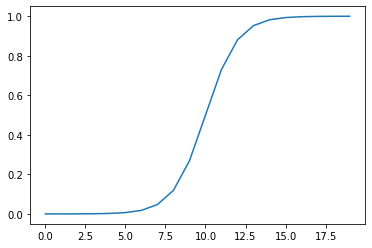

In [180]:
plt.plot(1/(1+np.exp(-np.arange(-10,10))))
plt.plot

**Propagación hacia adelante**

Es la red neuronal en funcionamiento. Recibe una entrada $\mathbf{x_i}$ y regresa una salida $y_i$

In [181]:
# Propagación hacia adelante del computo de la entrada.
# Recibe la estructura de la red representada por un diccionario que contiene los pesos.

def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [184]:
# Inventamos una red neuronal con la representación descrita
network = [
[{'weights': [0.13, 0.84, 0.76]},
 {'weights': [0.25, 0.49, 0.44]}],
    
 [{'weights': [0.65, 0.78, 0.09]}]]

#utilizamos un vector de entrada innventado
row = [1, 1]

#esta es la red en funcionamiento
output = forward_propagate(network, row)
print(output)

[0.7753511243987132]


In [187]:
# Se ha agregado lal diccionario la salida de cada capa
network

[[{'weights': [0.13, 0.84, 0.76], 'output': 0.8494124202541561},
  {'weights': [0.25, 0.49, 0.44], 'output': 0.7649478037637647}],
 [{'weights': [0.65, 0.78, 0.09], 'output': 0.7753511243987132}]]

**Derivada de transferencia hacia atrás de las capas intermedias**

Esta derivada es válida siempre y cuando las neuronas tengas una función de transferencia sigmoidal. Es útil para calcular la derivada parcial de todos los pesos de la red.

In [189]:
# Esta es la derivada de la función sigmoide
def transfer_derivative(output):
    return output * (1.0 - output)

**Propagación hacia atrás del error**

In [158]:

 
# Propaga el error hacia atrás y lo va guardando en la estructura de la red
def backward_propagate_error(network, expected):
    
    #comenzamos con la capa de salida
    for i in reversed(range(len(network))):
        
        # por cada capa de la red asignada a layer
        layer = network[i]
        
        #el tamaño de la capa es equivalente al numero de neuronas en la capa
        n_neuronas = len(layer)
        
        #inicializamos error
        errors = list()
        
        # la primera vez calculamos sobre la ultima capa que es a la que tenemos acceso en un inicio
        if i == len(network)-1:
            
            # aquí se utiliza el error.
            
            # por cada neurona de la capa hacer:
            for j in range(n_neuronas):
                
                
                #asignamos la neurona j de la capa i
                neuron = layer[j]
                
                #asignamos la salida de la red neuronal previamente calculada
                yhat = neuron['output']
                
                #y será la salida real del conjunto de datos
                y = expected[0]
            
                #esta es la derivada de la función de costo basada en la log-verosimilitud
                # LL(\theta) = (y log yhat + (1-y) log [1-yhat])
                
                # Aqui comienza la transferencia, con la derivada de LL(\theta)
                e = (yhat-y)/((yhat-1)*yhat)
                errors.append(e)
        
        else:
            #aquí son las capas restantes hacia atrás donde propagamos el error
            
            for j in range(n_neuronas):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
                
        #aqui guardamos todos los delta asociada a cada neurona de cada capa
        for j in range(n_neuronas):
            neuron = layer[j]
            
            #el error magnifica el delta que depende de derivada de transferencia
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 

In [193]:
backward_propagate_error(network, [3])


In [194]:
#Al propagar el error hacia atras se calculan los deltas o diferenciales de cada neurona
network

[[{'weights': [0.13, 0.84, 0.76],
   'output': 0.8494124202541561,
   'delta': 0.18496203349901957},
  {'weights': [0.25, 0.49, 0.44],
   'output': 0.7649478037637647,
   'delta': 0.3119982748337181}],
 [{'weights': [0.65, 0.78, 0.09],
   'output': 0.7753511243987132,
   'delta': 2.2246488756012868}]]

**Actualizar pesos con el error**

Se recibe la red con los deltas, y un vector de entrada $row$ y la tasa de aprendizaje $l_rate$ asignada por el usuario la cual especifica en porcentaje de actualización que queremos para los pesos.

In [195]:
# Update network weights with error
def update_weights(network, row, l_rate):
    
    # por cada capa de la red
    for i in range(len(network)):
        
        #extraer la clasificación real del vector de entrada. 
        inputs = row[:-1]
        
        #las salidas ahora son las entradas de la siguiente capa
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
 
        for neuron in network[i]:
            for j in range(len(inputs)):
                
                # por cada neurona y cada una de sus entradas
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            
            #actualización del bias
            neuron['weights'][-1] += l_rate * neuron['delta']
           

       
 

In [197]:
update_weights(network,[1,2,2],0.001)

In [199]:
#Se actualizan los pesos con los deltas.
network

[[{'weights': [0.13018496203349902, 0.840369924066998, 0.7601849620334991],
   'output': 0.8494124202541561,
   'delta': 0.18496203349901957},
  {'weights': [0.2503119982748337, 0.49062399654966743, 0.4403119982748337],
   'output': 0.7649478037637647,
   'delta': 0.3119982748337181}],
 [{'weights': [0.6518896443856402, 0.7817017402715367, 0.09222464887560128],
   'output': 0.7753511243987132,
   'delta': 2.2246488756012868}]]

**Entrenar la red con Gradiente Descendiente estocástico**

* Se parece mucho al algoritmo de gradiente descendiente. 
Una característica diferente a Gradiente descendiente normal, es que por cada iteación, utiliza un vector de entrada diferente para actualizar los pesos.

In [200]:
#recibe 
# network: la red neuronal contenida en formato diccionario de pesos
# l_rate: tasa de aprendizaje, se recomienda que sea un numero pequeño menor a 1
# n_epoch: numero de iteraciones
# n_outputs:

def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        
        #por cada vector en el conjunto de entrenamiento.
        for row in train:
            
            # se calcular la salida de un elemento del vector
            outputs = forward_propagate(network, row)
            
            #preparamos con ceros
            expected = [0 for i in range(n_outputs)]
    
            expected[0] = row[-1]
            
            #sumamos cada error en cada dimensión diferente
            
            #sum_error += sum([(expected[i]-outputs[i] )**2 for i in range(len(expected))])
            
            zi = expected[0]
            zi_e = outputs[0]
            
            #aquí el error reportado es la suma log verosimilitud , queremos que sea el máximo
            sum_error += zi*math.log(zi_e)+(1-zi)*math.log(1-zi_e)
        
            #print(expected)
            #propagamos hacia atrás 
            #el error generado por la diferencia de el valor esperado y el valor generado por la red
            # se reajusta la red para predecir mejor el valor esperado
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 



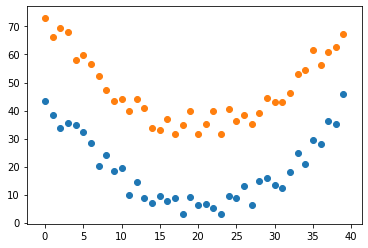

In [219]:
seed(1)


dataset = [[ 0.        , 43.57879291,  0.        ],
       [ 1.        , 38.25686159,  0.        ],
       [ 2.        , 33.65222425,  0.        ],
       [ 3.        , 35.58326609,  0.        ],
       [ 4.        , 34.71588722,  0.        ],
       [ 5.        , 32.38702072,  0.        ],
       [ 6.        , 28.39419039,  0.        ],
       [ 7.        , 20.20082333,  0.        ],
       [ 8.        , 24.19586975,  0.        ],
       [ 9.        , 18.48536939,  0.        ],
       [10.        , 19.43098795,  0.        ],
       [11.        ,  9.78931084,  0.        ],
       [12.        , 14.4403072 ,  0.        ],
       [13.        ,  8.95888303,  0.        ],
       [14.        ,  7.17704765,  0.        ],
       [15.        ,  9.57779397,  0.        ],
       [16.        ,  7.58424501,  0.        ],
       [17.        ,  8.9341588 ,  0.        ],
       [18.        ,  3.13378008,  0.        ],
       [19.        ,  9.23532406,  0.        ],
       [20.        ,  6.43370902,  0.        ],
       [21.        ,  6.67961846,  0.        ],
       [22.        ,  5.15107388,  0.        ],
       [23.        ,  3.13252828,  0.        ],
       [24.        ,  9.40036651,  0.        ],
       [25.        ,  8.96646931,  0.        ],
       [26.        , 12.97187713,  0.        ],
       [27.        ,  6.17097537,  0.        ],
       [28.        , 14.94380716,  0.        ],
       [29.        , 15.78038035,  0.        ],
       [30.        , 13.44006058,  0.        ],
       [31.        , 12.38640541,  0.        ],
       [32.        , 18.24681531,  0.        ],
       [33.        , 24.89568658,  0.        ],
       [34.        , 20.9740082 ,  0.        ],
       [35.        , 29.60592301,  0.        ],
       [36.        , 28.15828701,  0.        ],
       [37.        , 36.2793585 ,  0.        ],
       [38.        , 35.14373666,  0.        ],
       [39.        , 45.91909167,  0.        ],
       [ 0.        , 72.99963497,  1.        ],
       [ 1.        , 66.25249531,  1.        ],
       [ 2.        , 69.47862325,  1.        ],
       [ 3.        , 68.12423544,  1.        ],
       [ 4.        , 58.18406218,  1.        ],
       [ 5.        , 59.71572434,  1.        ],
       [ 6.        , 56.45457802,  1.        ],
       [ 7.        , 52.4068255 ,  1.        ],
       [ 8.        , 47.24274882,  1.        ],
       [ 9.        , 43.36311311,  1.        ],
       [10.        , 44.07483255,  1.        ],
       [11.        , 39.85302512,  1.        ],
       [12.        , 44.01192218,  1.        ],
       [13.        , 41.07318483,  1.        ],
       [14.        , 33.8127034 ,  1.        ],
       [15.        , 33.21045858,  1.        ],
       [16.        , 37.15741812,  1.        ],
       [17.        , 31.73730861,  1.        ],
       [18.        , 34.83305033,  1.        ],
       [19.        , 39.87419754,  1.        ],
       [20.        , 31.48844934,  1.        ],
       [21.        , 35.0882841 ,  1.        ],
       [22.        , 39.71262275,  1.        ],
       [23.        , 31.62777132,  1.        ],
       [24.        , 40.68066481,  1.        ],
       [25.        , 36.14619892,  1.        ],
       [26.        , 38.39007043,  1.        ],
       [27.        , 35.30625817,  1.        ],
       [28.        , 38.9855814 ,  1.        ],
       [29.        , 44.46375169,  1.        ],
       [30.        , 42.9567545 ,  1.        ],
       [31.        , 43.13876601,  1.        ],
       [32.        , 46.36785753,  1.        ],
       [33.        , 53.20209487,  1.        ],
       [34.        , 54.57671019,  1.        ],
       [35.        , 61.72180758,  1.        ],
       [36.        , 56.20328364,  1.        ],
       [37.        , 60.75140654,  1.        ],
       [38.        , 62.61155513,  1.        ],
       [39.        , 67.27858905,  1.        ]]

import numpy as np
import matplotlib.pyplot as plt
ds = np.array(dataset)

plt.scatter(ds[:40,0],ds[:40,1])
plt.scatter(ds[40:,0],ds[40:,1])




In [220]:

n_inputs = len(dataset[0]) - 1
print("inputs: ", n_inputs)

#total possible number of output values
n_outputs = len(set([ int(row[-1]) for row in dataset]))
n_outputs = 1 
print("outputs: ", n_outputs)

inputs:  2
outputs:  1


In [221]:
network = initialize_network(n_inputs, 4, n_outputs)
train_network(network, dataset, 0.01, 1, n_outputs)

e = 0
for x in dataset:
    y = forward_propagate(network, x[:2])
    e+= (x[-1]- 1*((y[-1])>0.5))**2

print("errores:",e)

>epoch=0, lrate=0.010, error=-77.767
errores: 40.0


In [222]:

train_network(network, dataset, 0.01, 5000, n_outputs)
for layer in network:
    print(layer)

>epoch=0, lrate=0.010, error=-61.422
>epoch=1, lrate=0.010, error=-57.029
>epoch=2, lrate=0.010, error=-55.768
>epoch=3, lrate=0.010, error=-55.356
>epoch=4, lrate=0.010, error=-55.210
>epoch=5, lrate=0.010, error=-55.156
>epoch=6, lrate=0.010, error=-55.135
>epoch=7, lrate=0.010, error=-55.127
>epoch=8, lrate=0.010, error=-55.123
>epoch=9, lrate=0.010, error=-55.121
>epoch=10, lrate=0.010, error=-55.120
>epoch=11, lrate=0.010, error=-55.118
>epoch=12, lrate=0.010, error=-55.116
>epoch=13, lrate=0.010, error=-55.114
>epoch=14, lrate=0.010, error=-55.112
>epoch=15, lrate=0.010, error=-55.109
>epoch=16, lrate=0.010, error=-55.105
>epoch=17, lrate=0.010, error=-55.101
>epoch=18, lrate=0.010, error=-55.095
>epoch=19, lrate=0.010, error=-55.088
>epoch=20, lrate=0.010, error=-55.077
>epoch=21, lrate=0.010, error=-55.063
>epoch=22, lrate=0.010, error=-55.042
>epoch=23, lrate=0.010, error=-55.008
>epoch=24, lrate=0.010, error=-54.954
>epoch=25, lrate=0.010, error=-54.860
>epoch=26, lrate=0.010

>epoch=255, lrate=0.010, error=-28.013
>epoch=256, lrate=0.010, error=-28.007
>epoch=257, lrate=0.010, error=-28.001
>epoch=258, lrate=0.010, error=-27.995
>epoch=259, lrate=0.010, error=-27.990
>epoch=260, lrate=0.010, error=-27.984
>epoch=261, lrate=0.010, error=-27.978
>epoch=262, lrate=0.010, error=-27.973
>epoch=263, lrate=0.010, error=-27.967
>epoch=264, lrate=0.010, error=-27.962
>epoch=265, lrate=0.010, error=-27.956
>epoch=266, lrate=0.010, error=-27.951
>epoch=267, lrate=0.010, error=-27.945
>epoch=268, lrate=0.010, error=-27.940
>epoch=269, lrate=0.010, error=-27.934
>epoch=270, lrate=0.010, error=-27.929
>epoch=271, lrate=0.010, error=-27.923
>epoch=272, lrate=0.010, error=-27.918
>epoch=273, lrate=0.010, error=-27.913
>epoch=274, lrate=0.010, error=-27.907
>epoch=275, lrate=0.010, error=-27.902
>epoch=276, lrate=0.010, error=-27.897
>epoch=277, lrate=0.010, error=-27.892
>epoch=278, lrate=0.010, error=-27.886
>epoch=279, lrate=0.010, error=-27.881
>epoch=280, lrate=0.010, 

>epoch=546, lrate=0.010, error=-27.192
>epoch=547, lrate=0.010, error=-27.191
>epoch=548, lrate=0.010, error=-27.190
>epoch=549, lrate=0.010, error=-27.189
>epoch=550, lrate=0.010, error=-27.188
>epoch=551, lrate=0.010, error=-27.186
>epoch=552, lrate=0.010, error=-27.185
>epoch=553, lrate=0.010, error=-27.184
>epoch=554, lrate=0.010, error=-27.183
>epoch=555, lrate=0.010, error=-27.182
>epoch=556, lrate=0.010, error=-27.181
>epoch=557, lrate=0.010, error=-27.180
>epoch=558, lrate=0.010, error=-27.179
>epoch=559, lrate=0.010, error=-27.178
>epoch=560, lrate=0.010, error=-27.177
>epoch=561, lrate=0.010, error=-27.176
>epoch=562, lrate=0.010, error=-27.175
>epoch=563, lrate=0.010, error=-27.174
>epoch=564, lrate=0.010, error=-27.173
>epoch=565, lrate=0.010, error=-27.172
>epoch=566, lrate=0.010, error=-27.171
>epoch=567, lrate=0.010, error=-27.171
>epoch=568, lrate=0.010, error=-27.170
>epoch=569, lrate=0.010, error=-27.169
>epoch=570, lrate=0.010, error=-27.168
>epoch=571, lrate=0.010, 

>epoch=838, lrate=0.010, error=-27.009
>epoch=839, lrate=0.010, error=-27.008
>epoch=840, lrate=0.010, error=-27.008
>epoch=841, lrate=0.010, error=-27.008
>epoch=842, lrate=0.010, error=-27.007
>epoch=843, lrate=0.010, error=-27.007
>epoch=844, lrate=0.010, error=-27.006
>epoch=845, lrate=0.010, error=-27.006
>epoch=846, lrate=0.010, error=-27.006
>epoch=847, lrate=0.010, error=-27.005
>epoch=848, lrate=0.010, error=-27.005
>epoch=849, lrate=0.010, error=-27.005
>epoch=850, lrate=0.010, error=-27.004
>epoch=851, lrate=0.010, error=-27.004
>epoch=852, lrate=0.010, error=-27.004
>epoch=853, lrate=0.010, error=-27.003
>epoch=854, lrate=0.010, error=-27.003
>epoch=855, lrate=0.010, error=-27.003
>epoch=856, lrate=0.010, error=-27.002
>epoch=857, lrate=0.010, error=-27.002
>epoch=858, lrate=0.010, error=-27.001
>epoch=859, lrate=0.010, error=-27.001
>epoch=860, lrate=0.010, error=-27.001
>epoch=861, lrate=0.010, error=-27.000
>epoch=862, lrate=0.010, error=-27.000
>epoch=863, lrate=0.010, 

>epoch=1077, lrate=0.010, error=-26.942
>epoch=1078, lrate=0.010, error=-26.942
>epoch=1079, lrate=0.010, error=-26.942
>epoch=1080, lrate=0.010, error=-26.941
>epoch=1081, lrate=0.010, error=-26.941
>epoch=1082, lrate=0.010, error=-26.941
>epoch=1083, lrate=0.010, error=-26.941
>epoch=1084, lrate=0.010, error=-26.941
>epoch=1085, lrate=0.010, error=-26.940
>epoch=1086, lrate=0.010, error=-26.940
>epoch=1087, lrate=0.010, error=-26.940
>epoch=1088, lrate=0.010, error=-26.940
>epoch=1089, lrate=0.010, error=-26.940
>epoch=1090, lrate=0.010, error=-26.939
>epoch=1091, lrate=0.010, error=-26.939
>epoch=1092, lrate=0.010, error=-26.939
>epoch=1093, lrate=0.010, error=-26.939
>epoch=1094, lrate=0.010, error=-26.939
>epoch=1095, lrate=0.010, error=-26.938
>epoch=1096, lrate=0.010, error=-26.938
>epoch=1097, lrate=0.010, error=-26.938
>epoch=1098, lrate=0.010, error=-26.938
>epoch=1099, lrate=0.010, error=-26.938
>epoch=1100, lrate=0.010, error=-26.937
>epoch=1101, lrate=0.010, error=-26.937


>epoch=1312, lrate=0.010, error=-26.902
>epoch=1313, lrate=0.010, error=-26.902
>epoch=1314, lrate=0.010, error=-26.902
>epoch=1315, lrate=0.010, error=-26.902
>epoch=1316, lrate=0.010, error=-26.902
>epoch=1317, lrate=0.010, error=-26.902
>epoch=1318, lrate=0.010, error=-26.902
>epoch=1319, lrate=0.010, error=-26.902
>epoch=1320, lrate=0.010, error=-26.901
>epoch=1321, lrate=0.010, error=-26.901
>epoch=1322, lrate=0.010, error=-26.901
>epoch=1323, lrate=0.010, error=-26.901
>epoch=1324, lrate=0.010, error=-26.901
>epoch=1325, lrate=0.010, error=-26.901
>epoch=1326, lrate=0.010, error=-26.901
>epoch=1327, lrate=0.010, error=-26.900
>epoch=1328, lrate=0.010, error=-26.900
>epoch=1329, lrate=0.010, error=-26.900
>epoch=1330, lrate=0.010, error=-26.900
>epoch=1331, lrate=0.010, error=-26.900
>epoch=1332, lrate=0.010, error=-26.900
>epoch=1333, lrate=0.010, error=-26.900
>epoch=1334, lrate=0.010, error=-26.900
>epoch=1335, lrate=0.010, error=-26.899
>epoch=1336, lrate=0.010, error=-26.899


>epoch=1528, lrate=0.010, error=-26.878
>epoch=1529, lrate=0.010, error=-26.878
>epoch=1530, lrate=0.010, error=-26.878
>epoch=1531, lrate=0.010, error=-26.877
>epoch=1532, lrate=0.010, error=-26.877
>epoch=1533, lrate=0.010, error=-26.877
>epoch=1534, lrate=0.010, error=-26.877
>epoch=1535, lrate=0.010, error=-26.877
>epoch=1536, lrate=0.010, error=-26.877
>epoch=1537, lrate=0.010, error=-26.877
>epoch=1538, lrate=0.010, error=-26.877
>epoch=1539, lrate=0.010, error=-26.877
>epoch=1540, lrate=0.010, error=-26.877
>epoch=1541, lrate=0.010, error=-26.876
>epoch=1542, lrate=0.010, error=-26.876
>epoch=1543, lrate=0.010, error=-26.876
>epoch=1544, lrate=0.010, error=-26.876
>epoch=1545, lrate=0.010, error=-26.876
>epoch=1546, lrate=0.010, error=-26.876
>epoch=1547, lrate=0.010, error=-26.876
>epoch=1548, lrate=0.010, error=-26.876
>epoch=1549, lrate=0.010, error=-26.876
>epoch=1550, lrate=0.010, error=-26.876
>epoch=1551, lrate=0.010, error=-26.876
>epoch=1552, lrate=0.010, error=-26.875


>epoch=1742, lrate=0.010, error=-26.860
>epoch=1743, lrate=0.010, error=-26.860
>epoch=1744, lrate=0.010, error=-26.860
>epoch=1745, lrate=0.010, error=-26.859
>epoch=1746, lrate=0.010, error=-26.859
>epoch=1747, lrate=0.010, error=-26.859
>epoch=1748, lrate=0.010, error=-26.859
>epoch=1749, lrate=0.010, error=-26.859
>epoch=1750, lrate=0.010, error=-26.859
>epoch=1751, lrate=0.010, error=-26.859
>epoch=1752, lrate=0.010, error=-26.859
>epoch=1753, lrate=0.010, error=-26.859
>epoch=1754, lrate=0.010, error=-26.859
>epoch=1755, lrate=0.010, error=-26.859
>epoch=1756, lrate=0.010, error=-26.859
>epoch=1757, lrate=0.010, error=-26.859
>epoch=1758, lrate=0.010, error=-26.859
>epoch=1759, lrate=0.010, error=-26.858
>epoch=1760, lrate=0.010, error=-26.858
>epoch=1761, lrate=0.010, error=-26.858
>epoch=1762, lrate=0.010, error=-26.858
>epoch=1763, lrate=0.010, error=-26.858
>epoch=1764, lrate=0.010, error=-26.858
>epoch=1765, lrate=0.010, error=-26.858
>epoch=1766, lrate=0.010, error=-26.858


>epoch=2000, lrate=0.010, error=-26.843
>epoch=2001, lrate=0.010, error=-26.843
>epoch=2002, lrate=0.010, error=-26.843
>epoch=2003, lrate=0.010, error=-26.843
>epoch=2004, lrate=0.010, error=-26.843
>epoch=2005, lrate=0.010, error=-26.843
>epoch=2006, lrate=0.010, error=-26.843
>epoch=2007, lrate=0.010, error=-26.843
>epoch=2008, lrate=0.010, error=-26.843
>epoch=2009, lrate=0.010, error=-26.843
>epoch=2010, lrate=0.010, error=-26.843
>epoch=2011, lrate=0.010, error=-26.843
>epoch=2012, lrate=0.010, error=-26.843
>epoch=2013, lrate=0.010, error=-26.843
>epoch=2014, lrate=0.010, error=-26.843
>epoch=2015, lrate=0.010, error=-26.843
>epoch=2016, lrate=0.010, error=-26.843
>epoch=2017, lrate=0.010, error=-26.842
>epoch=2018, lrate=0.010, error=-26.842
>epoch=2019, lrate=0.010, error=-26.842
>epoch=2020, lrate=0.010, error=-26.842
>epoch=2021, lrate=0.010, error=-26.842
>epoch=2022, lrate=0.010, error=-26.842
>epoch=2023, lrate=0.010, error=-26.842
>epoch=2024, lrate=0.010, error=-26.842


>epoch=2236, lrate=0.010, error=-26.832
>epoch=2237, lrate=0.010, error=-26.832
>epoch=2238, lrate=0.010, error=-26.832
>epoch=2239, lrate=0.010, error=-26.832
>epoch=2240, lrate=0.010, error=-26.832
>epoch=2241, lrate=0.010, error=-26.832
>epoch=2242, lrate=0.010, error=-26.832
>epoch=2243, lrate=0.010, error=-26.832
>epoch=2244, lrate=0.010, error=-26.832
>epoch=2245, lrate=0.010, error=-26.832
>epoch=2246, lrate=0.010, error=-26.832
>epoch=2247, lrate=0.010, error=-26.831
>epoch=2248, lrate=0.010, error=-26.831
>epoch=2249, lrate=0.010, error=-26.831
>epoch=2250, lrate=0.010, error=-26.831
>epoch=2251, lrate=0.010, error=-26.831
>epoch=2252, lrate=0.010, error=-26.831
>epoch=2253, lrate=0.010, error=-26.831
>epoch=2254, lrate=0.010, error=-26.831
>epoch=2255, lrate=0.010, error=-26.831
>epoch=2256, lrate=0.010, error=-26.831
>epoch=2257, lrate=0.010, error=-26.831
>epoch=2258, lrate=0.010, error=-26.831
>epoch=2259, lrate=0.010, error=-26.831
>epoch=2260, lrate=0.010, error=-26.831


>epoch=2488, lrate=0.010, error=-26.822
>epoch=2489, lrate=0.010, error=-26.822
>epoch=2490, lrate=0.010, error=-26.822
>epoch=2491, lrate=0.010, error=-26.822
>epoch=2492, lrate=0.010, error=-26.822
>epoch=2493, lrate=0.010, error=-26.822
>epoch=2494, lrate=0.010, error=-26.822
>epoch=2495, lrate=0.010, error=-26.822
>epoch=2496, lrate=0.010, error=-26.822
>epoch=2497, lrate=0.010, error=-26.822
>epoch=2498, lrate=0.010, error=-26.822
>epoch=2499, lrate=0.010, error=-26.822
>epoch=2500, lrate=0.010, error=-26.822
>epoch=2501, lrate=0.010, error=-26.822
>epoch=2502, lrate=0.010, error=-26.822
>epoch=2503, lrate=0.010, error=-26.822
>epoch=2504, lrate=0.010, error=-26.822
>epoch=2505, lrate=0.010, error=-26.822
>epoch=2506, lrate=0.010, error=-26.822
>epoch=2507, lrate=0.010, error=-26.822
>epoch=2508, lrate=0.010, error=-26.822
>epoch=2509, lrate=0.010, error=-26.822
>epoch=2510, lrate=0.010, error=-26.821
>epoch=2511, lrate=0.010, error=-26.821
>epoch=2512, lrate=0.010, error=-26.821


>epoch=2733, lrate=0.010, error=-26.815
>epoch=2734, lrate=0.010, error=-26.815
>epoch=2735, lrate=0.010, error=-26.815
>epoch=2736, lrate=0.010, error=-26.814
>epoch=2737, lrate=0.010, error=-26.814
>epoch=2738, lrate=0.010, error=-26.814
>epoch=2739, lrate=0.010, error=-26.814
>epoch=2740, lrate=0.010, error=-26.814
>epoch=2741, lrate=0.010, error=-26.814
>epoch=2742, lrate=0.010, error=-26.814
>epoch=2743, lrate=0.010, error=-26.814
>epoch=2744, lrate=0.010, error=-26.814
>epoch=2745, lrate=0.010, error=-26.814
>epoch=2746, lrate=0.010, error=-26.814
>epoch=2747, lrate=0.010, error=-26.814
>epoch=2748, lrate=0.010, error=-26.814
>epoch=2749, lrate=0.010, error=-26.814
>epoch=2750, lrate=0.010, error=-26.814
>epoch=2751, lrate=0.010, error=-26.814
>epoch=2752, lrate=0.010, error=-26.814
>epoch=2753, lrate=0.010, error=-26.814
>epoch=2754, lrate=0.010, error=-26.814
>epoch=2755, lrate=0.010, error=-26.814
>epoch=2756, lrate=0.010, error=-26.814
>epoch=2757, lrate=0.010, error=-26.814


>epoch=2965, lrate=0.010, error=-26.809
>epoch=2966, lrate=0.010, error=-26.809
>epoch=2967, lrate=0.010, error=-26.808
>epoch=2968, lrate=0.010, error=-26.808
>epoch=2969, lrate=0.010, error=-26.808
>epoch=2970, lrate=0.010, error=-26.808
>epoch=2971, lrate=0.010, error=-26.808
>epoch=2972, lrate=0.010, error=-26.808
>epoch=2973, lrate=0.010, error=-26.808
>epoch=2974, lrate=0.010, error=-26.808
>epoch=2975, lrate=0.010, error=-26.808
>epoch=2976, lrate=0.010, error=-26.808
>epoch=2977, lrate=0.010, error=-26.808
>epoch=2978, lrate=0.010, error=-26.808
>epoch=2979, lrate=0.010, error=-26.808
>epoch=2980, lrate=0.010, error=-26.808
>epoch=2981, lrate=0.010, error=-26.808
>epoch=2982, lrate=0.010, error=-26.808
>epoch=2983, lrate=0.010, error=-26.808
>epoch=2984, lrate=0.010, error=-26.808
>epoch=2985, lrate=0.010, error=-26.808
>epoch=2986, lrate=0.010, error=-26.808
>epoch=2987, lrate=0.010, error=-26.808
>epoch=2988, lrate=0.010, error=-26.808
>epoch=2989, lrate=0.010, error=-26.808


>epoch=3179, lrate=0.010, error=-26.804
>epoch=3180, lrate=0.010, error=-26.804
>epoch=3181, lrate=0.010, error=-26.804
>epoch=3182, lrate=0.010, error=-26.804
>epoch=3183, lrate=0.010, error=-26.804
>epoch=3184, lrate=0.010, error=-26.804
>epoch=3185, lrate=0.010, error=-26.804
>epoch=3186, lrate=0.010, error=-26.804
>epoch=3187, lrate=0.010, error=-26.804
>epoch=3188, lrate=0.010, error=-26.804
>epoch=3189, lrate=0.010, error=-26.804
>epoch=3190, lrate=0.010, error=-26.804
>epoch=3191, lrate=0.010, error=-26.804
>epoch=3192, lrate=0.010, error=-26.804
>epoch=3193, lrate=0.010, error=-26.803
>epoch=3194, lrate=0.010, error=-26.803
>epoch=3195, lrate=0.010, error=-26.803
>epoch=3196, lrate=0.010, error=-26.803
>epoch=3197, lrate=0.010, error=-26.803
>epoch=3198, lrate=0.010, error=-26.803
>epoch=3199, lrate=0.010, error=-26.803
>epoch=3200, lrate=0.010, error=-26.803
>epoch=3201, lrate=0.010, error=-26.803
>epoch=3202, lrate=0.010, error=-26.803
>epoch=3203, lrate=0.010, error=-26.803


>epoch=3391, lrate=0.010, error=-26.800
>epoch=3392, lrate=0.010, error=-26.800
>epoch=3393, lrate=0.010, error=-26.800
>epoch=3394, lrate=0.010, error=-26.800
>epoch=3395, lrate=0.010, error=-26.800
>epoch=3396, lrate=0.010, error=-26.800
>epoch=3397, lrate=0.010, error=-26.800
>epoch=3398, lrate=0.010, error=-26.800
>epoch=3399, lrate=0.010, error=-26.800
>epoch=3400, lrate=0.010, error=-26.800
>epoch=3401, lrate=0.010, error=-26.800
>epoch=3402, lrate=0.010, error=-26.799
>epoch=3403, lrate=0.010, error=-26.799
>epoch=3404, lrate=0.010, error=-26.799
>epoch=3405, lrate=0.010, error=-26.799
>epoch=3406, lrate=0.010, error=-26.799
>epoch=3407, lrate=0.010, error=-26.799
>epoch=3408, lrate=0.010, error=-26.799
>epoch=3409, lrate=0.010, error=-26.799
>epoch=3410, lrate=0.010, error=-26.799
>epoch=3411, lrate=0.010, error=-26.799
>epoch=3412, lrate=0.010, error=-26.799
>epoch=3413, lrate=0.010, error=-26.799
>epoch=3414, lrate=0.010, error=-26.799
>epoch=3415, lrate=0.010, error=-26.799


>epoch=3677, lrate=0.010, error=-26.795
>epoch=3678, lrate=0.010, error=-26.795
>epoch=3679, lrate=0.010, error=-26.795
>epoch=3680, lrate=0.010, error=-26.795
>epoch=3681, lrate=0.010, error=-26.795
>epoch=3682, lrate=0.010, error=-26.795
>epoch=3683, lrate=0.010, error=-26.795
>epoch=3684, lrate=0.010, error=-26.795
>epoch=3685, lrate=0.010, error=-26.795
>epoch=3686, lrate=0.010, error=-26.795
>epoch=3687, lrate=0.010, error=-26.795
>epoch=3688, lrate=0.010, error=-26.795
>epoch=3689, lrate=0.010, error=-26.795
>epoch=3690, lrate=0.010, error=-26.795
>epoch=3691, lrate=0.010, error=-26.795
>epoch=3692, lrate=0.010, error=-26.795
>epoch=3693, lrate=0.010, error=-26.795
>epoch=3694, lrate=0.010, error=-26.795
>epoch=3695, lrate=0.010, error=-26.795
>epoch=3696, lrate=0.010, error=-26.795
>epoch=3697, lrate=0.010, error=-26.795
>epoch=3698, lrate=0.010, error=-26.795
>epoch=3699, lrate=0.010, error=-26.795
>epoch=3700, lrate=0.010, error=-26.795
>epoch=3701, lrate=0.010, error=-26.795


>epoch=3966, lrate=0.010, error=-26.791
>epoch=3967, lrate=0.010, error=-26.791
>epoch=3968, lrate=0.010, error=-26.791
>epoch=3969, lrate=0.010, error=-26.791
>epoch=3970, lrate=0.010, error=-26.791
>epoch=3971, lrate=0.010, error=-26.791
>epoch=3972, lrate=0.010, error=-26.791
>epoch=3973, lrate=0.010, error=-26.791
>epoch=3974, lrate=0.010, error=-26.791
>epoch=3975, lrate=0.010, error=-26.791
>epoch=3976, lrate=0.010, error=-26.791
>epoch=3977, lrate=0.010, error=-26.791
>epoch=3978, lrate=0.010, error=-26.791
>epoch=3979, lrate=0.010, error=-26.791
>epoch=3980, lrate=0.010, error=-26.791
>epoch=3981, lrate=0.010, error=-26.791
>epoch=3982, lrate=0.010, error=-26.791
>epoch=3983, lrate=0.010, error=-26.791
>epoch=3984, lrate=0.010, error=-26.791
>epoch=3985, lrate=0.010, error=-26.791
>epoch=3986, lrate=0.010, error=-26.791
>epoch=3987, lrate=0.010, error=-26.791
>epoch=3988, lrate=0.010, error=-26.791
>epoch=3989, lrate=0.010, error=-26.791
>epoch=3990, lrate=0.010, error=-26.791


>epoch=4263, lrate=0.010, error=-26.787
>epoch=4264, lrate=0.010, error=-26.787
>epoch=4265, lrate=0.010, error=-26.787
>epoch=4266, lrate=0.010, error=-26.787
>epoch=4267, lrate=0.010, error=-26.787
>epoch=4268, lrate=0.010, error=-26.787
>epoch=4269, lrate=0.010, error=-26.787
>epoch=4270, lrate=0.010, error=-26.787
>epoch=4271, lrate=0.010, error=-26.787
>epoch=4272, lrate=0.010, error=-26.787
>epoch=4273, lrate=0.010, error=-26.787
>epoch=4274, lrate=0.010, error=-26.787
>epoch=4275, lrate=0.010, error=-26.787
>epoch=4276, lrate=0.010, error=-26.787
>epoch=4277, lrate=0.010, error=-26.787
>epoch=4278, lrate=0.010, error=-26.787
>epoch=4279, lrate=0.010, error=-26.787
>epoch=4280, lrate=0.010, error=-26.787
>epoch=4281, lrate=0.010, error=-26.787
>epoch=4282, lrate=0.010, error=-26.787
>epoch=4283, lrate=0.010, error=-26.787
>epoch=4284, lrate=0.010, error=-26.787
>epoch=4285, lrate=0.010, error=-26.787
>epoch=4286, lrate=0.010, error=-26.787
>epoch=4287, lrate=0.010, error=-26.787


>epoch=4520, lrate=0.010, error=-26.784
>epoch=4521, lrate=0.010, error=-26.784
>epoch=4522, lrate=0.010, error=-26.784
>epoch=4523, lrate=0.010, error=-26.784
>epoch=4524, lrate=0.010, error=-26.784
>epoch=4525, lrate=0.010, error=-26.784
>epoch=4526, lrate=0.010, error=-26.784
>epoch=4527, lrate=0.010, error=-26.784
>epoch=4528, lrate=0.010, error=-26.784
>epoch=4529, lrate=0.010, error=-26.784
>epoch=4530, lrate=0.010, error=-26.784
>epoch=4531, lrate=0.010, error=-26.784
>epoch=4532, lrate=0.010, error=-26.784
>epoch=4533, lrate=0.010, error=-26.784
>epoch=4534, lrate=0.010, error=-26.784
>epoch=4535, lrate=0.010, error=-26.784
>epoch=4536, lrate=0.010, error=-26.784
>epoch=4537, lrate=0.010, error=-26.784
>epoch=4538, lrate=0.010, error=-26.784
>epoch=4539, lrate=0.010, error=-26.784
>epoch=4540, lrate=0.010, error=-26.784
>epoch=4541, lrate=0.010, error=-26.784
>epoch=4542, lrate=0.010, error=-26.784
>epoch=4543, lrate=0.010, error=-26.784
>epoch=4544, lrate=0.010, error=-26.784


>epoch=4812, lrate=0.010, error=-26.782
>epoch=4813, lrate=0.010, error=-26.782
>epoch=4814, lrate=0.010, error=-26.782
>epoch=4815, lrate=0.010, error=-26.782
>epoch=4816, lrate=0.010, error=-26.782
>epoch=4817, lrate=0.010, error=-26.782
>epoch=4818, lrate=0.010, error=-26.782
>epoch=4819, lrate=0.010, error=-26.782
>epoch=4820, lrate=0.010, error=-26.782
>epoch=4821, lrate=0.010, error=-26.782
>epoch=4822, lrate=0.010, error=-26.782
>epoch=4823, lrate=0.010, error=-26.782
>epoch=4824, lrate=0.010, error=-26.782
>epoch=4825, lrate=0.010, error=-26.782
>epoch=4826, lrate=0.010, error=-26.782
>epoch=4827, lrate=0.010, error=-26.782
>epoch=4828, lrate=0.010, error=-26.782
>epoch=4829, lrate=0.010, error=-26.782
>epoch=4830, lrate=0.010, error=-26.782
>epoch=4831, lrate=0.010, error=-26.782
>epoch=4832, lrate=0.010, error=-26.782
>epoch=4833, lrate=0.010, error=-26.782
>epoch=4834, lrate=0.010, error=-26.782
>epoch=4835, lrate=0.010, error=-26.782
>epoch=4836, lrate=0.010, error=-26.782


In [217]:
e = 0
for x in dataset:
    y = forward_propagate(network, x[:2])
    e+= (x[-1]- 1*((y[-1])>0.5))**2

print("errores:",e)

errores: 11.0
